# Speed Dating Dataset

This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

There are 122 columns(independent variables) in the dataset, match column(dependent variable) needs to be predicted.

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dating = pd.read_csv('speeddating.csv')
dating.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [33]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), object(64)
memory usage: 7.9+ MB


In [34]:
dating.shape

(8378, 123)

In [35]:
#data types in the features
dating.dtypes.value_counts()

object     64
float64    59
dtype: int64

In [36]:
#looking for columns with unique values
dating.nunique().sort_values()

has_null                        1
decision                        2
decision_o                      2
samerace                        2
match                           2
                             ... 
shared_interests_important     85
attractive_important           94
pref_o_attractive              94
interests_correlate           155
field                         260
Length: 123, dtype: int64

In [37]:
#drop the column has_null because it has only one value for all the rows
dating.drop(['has_null'], axis = 1, inplace= True)

In [38]:
#create a function that removes all the unwanted characters b', ''
def remove_characters(feature):
    return feature.replace("b'",'').replace("'","")

#select string columns
string_dataset = dating.select_dtypes(include = ['object'])

#remove the characters
for feature in string_dataset.columns:
    dating[feature] = dating[feature].apply(lambda x: remove_characters(x))

In [39]:
#the columns with the prefix d_ are the values of other columns but binned
to_drop = [column_name for column_name in dating.columns if column_name.startswith('d_')]
dating.drop(to_drop, axis = 1, inplace = True)

In [40]:
dating.shape

(8378, 66)

In [41]:
#decision and decision_o at night event are basically the same as match, match it is calculated from them
dating.drop(['decision', 'decision_o'], axis = 1, inplace= True)

In [42]:
missing_columns = dating.isnull().sum().sort_values()

In [43]:
#drop the columns that have more than the 5% of missing values
dating.drop(['expected_num_interested_in_me', 'expected_num_matches', 'shared_interests_o',
             'shared_interests_partner', 'ambitous_o', 'ambition_partner'], axis = 1, inplace= True)

In [44]:
#There's to columns of age, from self and o, we can get just one age column from diff = self - o
dating['age_diff'] = dating['age'] - dating['age_o']
dating.drop(['age','age_o'], axis = 1, inplace = True)

In [45]:
#if they had met the partner before, yes or no (1 or 0)
dating['met'].value_counts()

0.0    7644
1.0     351
7.0       3
5.0       2
3.0       1
8.0       1
6.0       1
Name: met, dtype: int64

In [46]:
#I change the few different values for the mode that is 0
for number in [3.0, 5.0, 6.0, 7.0, 8.0]:
    dating['met'].replace(number,0, inplace =True)

In [47]:
dating['met'].value_counts()

0.0    7652
1.0     351
Name: met, dtype: int64

In [48]:
#field has many different categorical values, when I convert this column into a numeric one, it sums more than 200 columns
dating.drop(['field'], axis = 1, inplace = True)

In [49]:
dating.shape

(8378, 56)

In [50]:
missing_rows=dating.isnull().sum(axis = 1)
missing_rows.value_counts()

0     7079
1      627
2      143
11     119
3       85
4       61
7       58
8       54
33      48
5       37
32      15
6        8
34       6
19       5
9        5
13       5
12       5
44       5
10       4
15       3
37       2
18       1
43       1
39       1
40       1
dtype: int64

In [51]:
dating_clean = dating.dropna()  #drop 15% of the rows

In [52]:
dating_clean.shape

(7079, 56)

In [53]:
dating_clean.isnull().sum().sum()

0

In [54]:
#numeric columns
columns_numeric = dating_clean.select_dtypes(include = ['int','float']).columns.tolist()

#categorical columns
columns_category = dating_clean.select_dtypes(include = ['object']).drop('match', axis=1).columns

In [55]:
dating_clean[columns_category]

,gender,race,race_o,samerace
0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
1,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
3,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
4,female,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0
5,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
...,...,...,...,...
8372,male,European/Caucasian-American,European/Caucasian-American,1
8373,male,European/Caucasian-American,Latino/Hispanic American,0
8374,male,European/Caucasian-American,Other,0
8376,male,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0


In [56]:
dating_clean[columns_numeric]

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,age_diff
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,10.0,9.0,8.0,1.0,0.14,3.0,7.0,6.0,0.0,-6.0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,10.0,9.0,8.0,1.0,0.54,3.0,7.0,5.0,1.0,-1.0
3,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,10.0,9.0,8.0,1.0,0.61,3.0,7.0,6.0,0.0,-2.0
4,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,10.0,9.0,8.0,1.0,0.21,3.0,6.0,6.0,0.0,-3.0
5,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,10.0,9.0,8.0,1.0,0.25,3.0,6.0,5.0,0.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,21.0,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,...,10.0,10.0,7.0,3.0,0.28,10.0,4.0,4.0,0.0,1.0
8373,21.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,...,10.0,10.0,7.0,3.0,0.64,10.0,2.0,5.0,0.0,-1.0
8374,21.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,...,10.0,10.0,7.0,3.0,0.71,10.0,4.0,4.0,0.0,1.0
8376,21.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,...,10.0,10.0,7.0,3.0,0.62,10.0,5.0,5.0,0.0,3.0


In [57]:
#use get dummies to convert categorical attributes into numericals
dating_ready = pd.get_dummies(data=dating_clean, columns=['gender', 'race', 'race_o', 'samerace', 'match'],drop_first=True)

In [58]:
dating_ready.shape

(7079, 62)

In [59]:
dating_ready.isnull().sum().sum()

0

In [60]:
dating_ready.dtypes.value_counts()

float64    51
uint8      11
dtype: int64

In [61]:
dating_ready.describe()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,match_1
count,7079.000000,7079.000000,7079.00000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,...,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.00000,7079.000000
mean,11.299336,3.782738,3.65772,22.232585,17.444366,20.304576,17.490668,10.723546,11.848880,6.209549,...,0.047606,0.563921,0.077977,0.067382,0.048736,0.560107,0.080096,0.065970,0.40048,0.174318
std,5.957994,2.832566,2.81831,12.372573,6.932509,6.831764,6.092708,6.107862,6.348855,1.939503,...,0.212945,0.495932,0.268155,0.250701,0.215330,0.496409,0.271461,0.248247,0.49003,0.379410
min,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000000,1.000000,1.00000,15.000000,15.000000,17.500000,15.000000,5.000000,9.520000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,11.000000,3.000000,3.00000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,15.000000,6.000000,6.00000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
max,21.000000,10.000000,10.00000,100.000000,47.000000,50.000000,50.000000,53.000000,30.000000,10.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [62]:
dating_ready.columns

Index(['wave', 'importance_same_race', 'importance_same_religion',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'expected_happy_with_sd_people', 'like',
       'guess_prob_liked', 'met', 'age_diff', 'gender_male',
       'race_Black/African American', 'race_European/Caucasian-American',
       'race_L

# Logistic Regression and Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
#choose attributes to make the regression and the target
y = dating_ready[['match_1']]
X = dating_ready.drop(['match_1'], axis = 1) #all the attributes
X1 = X[['like', 'met']] 
X2 = X[['shopping', 'concerts', 'clubbing']]
X3 = X[['sports', 'tvsports', 'hiking', 'exercise']]

In [98]:
y.shape

(7079, 1)

In [99]:
X.shape

(7079, 61)

In [100]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,gender_male,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,0,0,1,0,0
5,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
from imblearn.over_sampling import RandomOverSampler

#aplicar el sobremuestreo aleatorio a la clase minoritariaros = RandomOverSampler()
ros = RandomOverSampler()

X1, y1 = ros.fit_resample(X1, y)
X2, y2 = ros.fit_resample(X2, y)
X3, y3 = ros.fit_resample(X3, y)
X, y = ros.fit_resample(X, y)

In [102]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,gender_male,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X = log_reg.fit(X_train, y_train)
test_X = log_reg.score(X_test, y_test)

result_X = cross_val_score(log_reg, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X1 = log_reg.fit(X1_train, y1_train)
test_X1 = log_reg.score(X1_test, y1_test)

result_X1 = cross_val_score(log_reg, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X2 = log_reg.fit(X2_train, y2_train)
test_X2 = log_reg.score(X2_test, y2_test)

result_X2 = cross_val_score(log_reg, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X3 = log_reg.fit(X3_train, y3_train)
test_X3 = log_reg.score(X3_test, y3_test)

result_X3 = cross_val_score(log_reg, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X = tree.fit(X_train, y_train)
test_X = tree.score(X_test, y_test)

result_X = cross_val_score(tree, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X1 = tree.fit(X1_train, y1_train)
test_X1 = tree.score(X1_test, y1_test)

result_X1 = cross_val_score(tree, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X2 = tree.fit(X2_train, y2_train)
test_X2 = tree.score(X2_test, y2_test)

result_X2 = cross_val_score(tree, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

In [ ]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X3 = tree.fit(X3_train, y3_train)
test_X3 = tree.score(X3_test, y3_test)

result_X3 = cross_val_score(tree, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Look for the hyperparameters of the decision tree: criterion, min_samples_leaf, max_depth and random_state.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 50, 100, 150, 200],
              'max_depth': [2, 4, 6, 8, 10, 12], 'random_state': [0, 10, 42]}

tree = DecisionTreeClassifier()

searching_X = GridSearchCV(tree, parameters, cv=5)
searching_X.fit(X_train, y_train)

searching_X1 = GridSearchCV(tree, parameters, cv=5)
searching_X1.fit(X1_train, y1_train)

searching_X2 = GridSearchCV(tree, parameters, cv=5)
searching_X2.fit(X2_train, y2_train)

searching_X3 = GridSearchCV(tree, parameters, cv=5)
searching_X3.fit(X3_train, y3_train)


print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

print("Best parameters for X1: ", searching_X1.best_params_)
print("Mean for X1: ", searching_X1.best_score_)

print("Best parameters for X2: ", searching_X2.best_params_)
print("Mean for X2: ", searching_X2.best_score_)

print("Best parameters for X3: ", searching_X3.best_params_)
print("Mean for X3: ", searching_X3.best_score_)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#all the attributes, cv = 5 means we split the data en 5 folds
forest = RandomForestClassifier(random_state=0)

training_X = forest.fit(X_train, y_train)
test_X = forest.score(X_test, y_test)

result_X = cross_val_score(forest, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

In [ ]:
forest = RandomForestClassifier(random_state=0)

training_X1 = forest.fit(X1_train, y1_train)
test_X1 = forest.score(X1_test, y1_test)

result_X1 = cross_val_score(forest, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

In [ ]:
forest = RandomForestClassifier(random_state=0)

training_X2 = forest.fit(X2_train, y2_train)
test_X2 = forest.score(X2_test, y2_test)

result_X2 = cross_val_score(forest, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

In [ ]:
forest = RandomForestClassifier(random_state=0)

training_X3 = forest.fit(X3_train, y3_train)
test_X3 = forest.score(X3_test, y3_test)

result_X3 = cross_val_score(forest, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Look for some of the hyperparameters of the random forest: n_estimators, min_samples_leaf, max_features.

In [ ]:
parameters = {'min_samples_leaf': [5, 10, 50, 100, 150, 200], 
              'n_estimators': [50, 100, 150, 200], 'max_features': ['sqrt', 'log2']}

forest = RandomForestClassifier(random_state=0)

searching_X = GridSearchCV(forest, parameters, cv=5)
searching_X.fit(X_train, y_train)
searching_X1= GridSearchCV(forest, parameters, cv=5)
searching_X1.fit(X1_train, y1_train)
searching_X2 = GridSearchCV(forest, parameters, cv=5)
searching_X2.fit(X2_train, y_train)
searching_X3 = GridSearchCV(forest, parameters, cv=5)
searching_X3.fit(X3_train, y_train)

print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

print("Best parameters for X1: ", searching_X1.best_params_)
print("Mean for X1: ", searching_X1.best_score_)

print("Best parameters for X2: ", searching_X2.best_params_)
print("Mean for X2: ", searching_X2.best_score_)

print("Best parameters for X3: ", searching_X3.best_params_)
print("Mean for X3: ", searching_X3.best_score_)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

polynomial = SVC(kernel='poly', random_state = 0)

training_X = polynomial.fit(X_train,y_train)
test_X = polynomial.score(X_test, y_test)

result_X = cross_val_score(polynomial, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

In [ ]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X1 = polynomial.fit(X1_train,y1_train)
test_X1 = polynomial.score(X1_test, y1_test)

result_X1 = cross_val_score(polynomial, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

In [ ]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X2 = polynomial.fit(X2_train,y2_train)
test_X2 = polynomial.score(X2_test, y2_test)

result_X2 = cross_val_score(polynomial, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

In [ ]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X3 = polynomial.fit(X3_train,y3_train)
test_X3 = polynomial.score(X3_test, y3_test)

result_X3 = cross_val_score(polynomial, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Look for the hyperparameters of the polynomial kernel: $\gamma$, $r$ and $d$.

In [ ]:
parameters = {'degree': [2, 3, 4],
              'gamma': [0.1, 1, 10],
              'coef0': [0, 1, 2]}

polynomial = SVC(kernel='poly', random_state = 0)

searching_X = GridSearchCV(polynomial, parameters, cv=5)
searching_X.fit(X_train, y_train)

print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

y_predicted = searching_X.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)

# All the results

In [63]:
# X = dating_ready.drop(['match_1'], axis = 1) #all the attributes
# X1 = X[['like', 'met']] 
# X2 = X[['shopping', 'concerts', 'clubbing']]
# X3 = X[['sports', 'tvsports', 'hiking', 'exercise']]

from tabulate import tabulate 
#create data
data = [["X", 0.770, 0.772, 0.909, 0.889, 0.829, 0.956, 0.938, 0.898, 0.795, 0.805],
        ["X1", 0.681, 0.694, 0.681, 0.695, 0.695, 0.681, 0.695, 0.695, 0.677, 0.692],
        ["X2", 0.530, 0.536, 0.651, 0.643, 0.635, 0.650, 0.644, 0.645, 0.545, 0.548],
        ["X3", 0.514, 0.509, 0.679, 0.664, 0.640, 0.674, 0.664, 0.666, 0.522, 0.519]
        ]
  
#define header names
col_names = ["Features", "Log Reg", "Log Reg CV", "Dec Tree", "Dec Tree CV", "Dec Tree Hyp",
             "Rand Forest", "Rand Forest CV", "Rand Forest Hyp", "Poly", "Poly CV"]
  

In [64]:
import pandas as pd
resume = pd.DataFrame(data, columns=["Features", "Log Reg", "Log Reg CV", "Dec Tree", "Dec Tree CV", "Dec Tree Hyp",
             "Rand Forest", "Rand Forest CV", "Rand Forest Hyp", "Poly", "Poly CV"])

In [65]:
resume.head()

,Features,Log Reg,Log Reg CV,Dec Tree,Dec Tree CV,Dec Tree Hyp,Rand Forest,Rand Forest CV,Rand Forest Hyp,Poly,Poly CV
0,X,0.770,0.772,0.909,0.889,0.829,0.956,0.938,0.898,0.795,0.805
1,X1,0.681,0.694,0.681,0.695,0.695,0.681,0.695,0.695,0.677,0.692
2,X2,0.530,0.536,0.651,0.643,0.635,0.650,0.644,0.645,0.545,0.548
3,X3,0.514,0.509,0.679,0.664,0.640,0.674,0.664,0.666,0.522,0.519


# Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

In [73]:
X_norm = MinMaxScaler().fit_transform(X) #use X, the balanced dataset

In [74]:
X_norm.shape

(11690, 61)

In [75]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

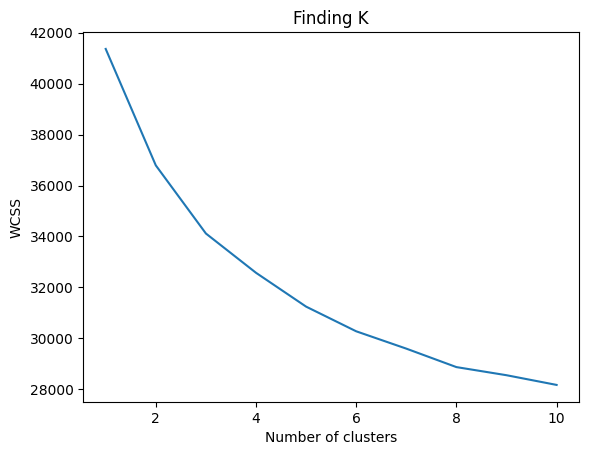

In [76]:
plt.plot(range(1,11),wcss)
plt.title('Finding K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph K=3

In [77]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(X_norm)

KMeans(n_clusters=3)

In [78]:
X['Kmeans_Clusters'] = clustering.labels_

In [79]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,Kmeans_Clusters
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,0,1,0,0,0,2
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,0,1,0,0,0,2
2,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,0,1,0,0,0,2
3,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,0,1,0,0,2
4,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,0,1,0,0,0,2


In [80]:
X.shape

(11690, 62)

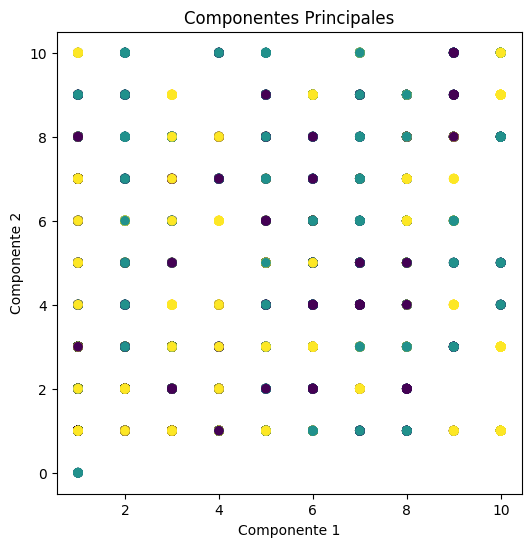

In [81]:
import numpy as np
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot (1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title("Componentes Principales")

# color_theme = np.array(["blue", "green", "orange"]) 
ax.scatter (x = X['importance_same_religion'], y = X['importance_same_race'],
c=X['Kmeans_Clusters'])

plt.show()

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_dating = pca.fit_transform(X_norm) 
pca_result = pd.DataFrame (data=pca_dating, columns=['Componente_1', 'Componente_2']) 

pca_result_clusters = pd.concat([pca_result, X[['Kmeans_Clusters']]], axis=1)

In [83]:
pca_result_clusters.head()

,Componente_1,Componente_2,Kmeans_Clusters
0,0.277489,-0.371612,2
1,0.266155,-0.423641,2
2,0.263995,-0.383700,2
3,0.890102,-0.055483,2
4,0.283699,-0.389042,2


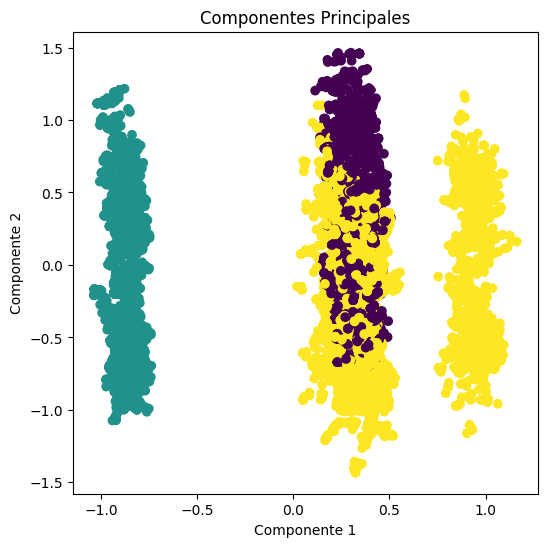

In [84]:
import numpy as np
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot (1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title("Componentes Principales")

# color_theme = np.array(["blue", "green", "orange"]) 
ax.scatter (x = pca_result_clusters['Componente_1'], y = pca_result_clusters['Componente_2'],
c=pca_result_clusters['Kmeans_Clusters'])

plt.show()